<a href="https://colab.research.google.com/github/T0bbster/OMapScanner/blob/master/train/OMapScanner_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OMapScanner Training


# 1. Setup

## Clone YOLOv5

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# 2. Download OMaps Dataset

In [ ]:
img_size = 441
dataset = f'omapsv5-{img_size}'

In [ ]:
torch.hub.download_url_to_file('https://github.com/T0bbster/OMapScanner/releases/download/v0.1-alpha.1/omaps.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

# 3. Train

Start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

Train a YOLOv5s model on **OMaps Dataset** `--data omaps.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard (optional)
#%load_ext tensorboard
#%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

     |████████████████████████████████| 2.0MB 4.2MB/s 
     |████████████████████████████████| 163kB 38.0MB/s 
     |████████████████████████████████| 133kB 40.4MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Train YOLOv5s on OMaps
!python train.py --batch 16 --epochs 1000 --data ../omaps/omaps.yaml --weights '' --nosave --cache --img-size {img_size} --cfg yolov5m.yaml

In [ ]:
# Detect on given images
!python detect.py --weights runs/train/exp/weights/last.pt --img {img_size} --conf 0.25 --source ../omaps/images/

## Save the model on GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = 'omaps-v5s'
path = f"/content/gdrive/My Drive/OMap Scanner/Models/{model}/" 
#!mkdir "/content/gdrive/My Drive/OMap Scanner/Models/omaps-v5s"
!cp runs/train/exp/weights/last.pt /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Models/omaps-v5m

In [ ]:
!cp runs/detect/exp/* /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Detected/

# 4. Detect labels on unknown data
Load the model from GDrive

In [ ]:
!cp /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Models/omaps-v5m models/omapsv5m.pt

Copy the data

In [ ]:
!cp -r /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Data/Test ../Test

In [ ]:
!python detect.py --weights models/omapsv5m.pt --img 960 --conf 0.25 --source ../Test/ --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=960, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../Test/', update=False, view_img=False, weights=['models/omapsv5m.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21086130 parameters, 0 gradients, 50.5 GFLOPS
image 1/49 /content/yolov5/../Test/1107.jpg: 704x960 1 map_name, 1 event_date, Done. (0.030s)
image 2/49 /content/yolov5/../Test/1132.jpg: 928x960 1 map_name, 1 map_scale, 2 contours_distances, 1 course_class, Done. (0.035s)
image 3/49 /content/yolov5/../Test/1184.jpg: 704x960 1 map_name, 1 map_scale, 1 contours_distance, 1 course_distance, 1 course_class, 2 event_names, 1 event_date, 5 sponsors, Done. (0.029s)
image 4/49 /content/yolov5/../Test/1207.jpg: 736x960 1 map_name, 1 contours_distance, 1 sponsor, Done. (0.030s)
image 5/49 /content/yolov

In [ ]:
!mkdir -p /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Detected/Test/images/

In [ ]:
!cp -r runs/detect/exp4/* /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Detected/Test/images/

In [ ]:
!mkdir -p /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Detected/Test/labels/

In [ ]:
!cp runs/detect/exp4/labels/* /content/gdrive/MyDrive/10\ -\ Projects/OMapScanner/Detected/Test/labels/

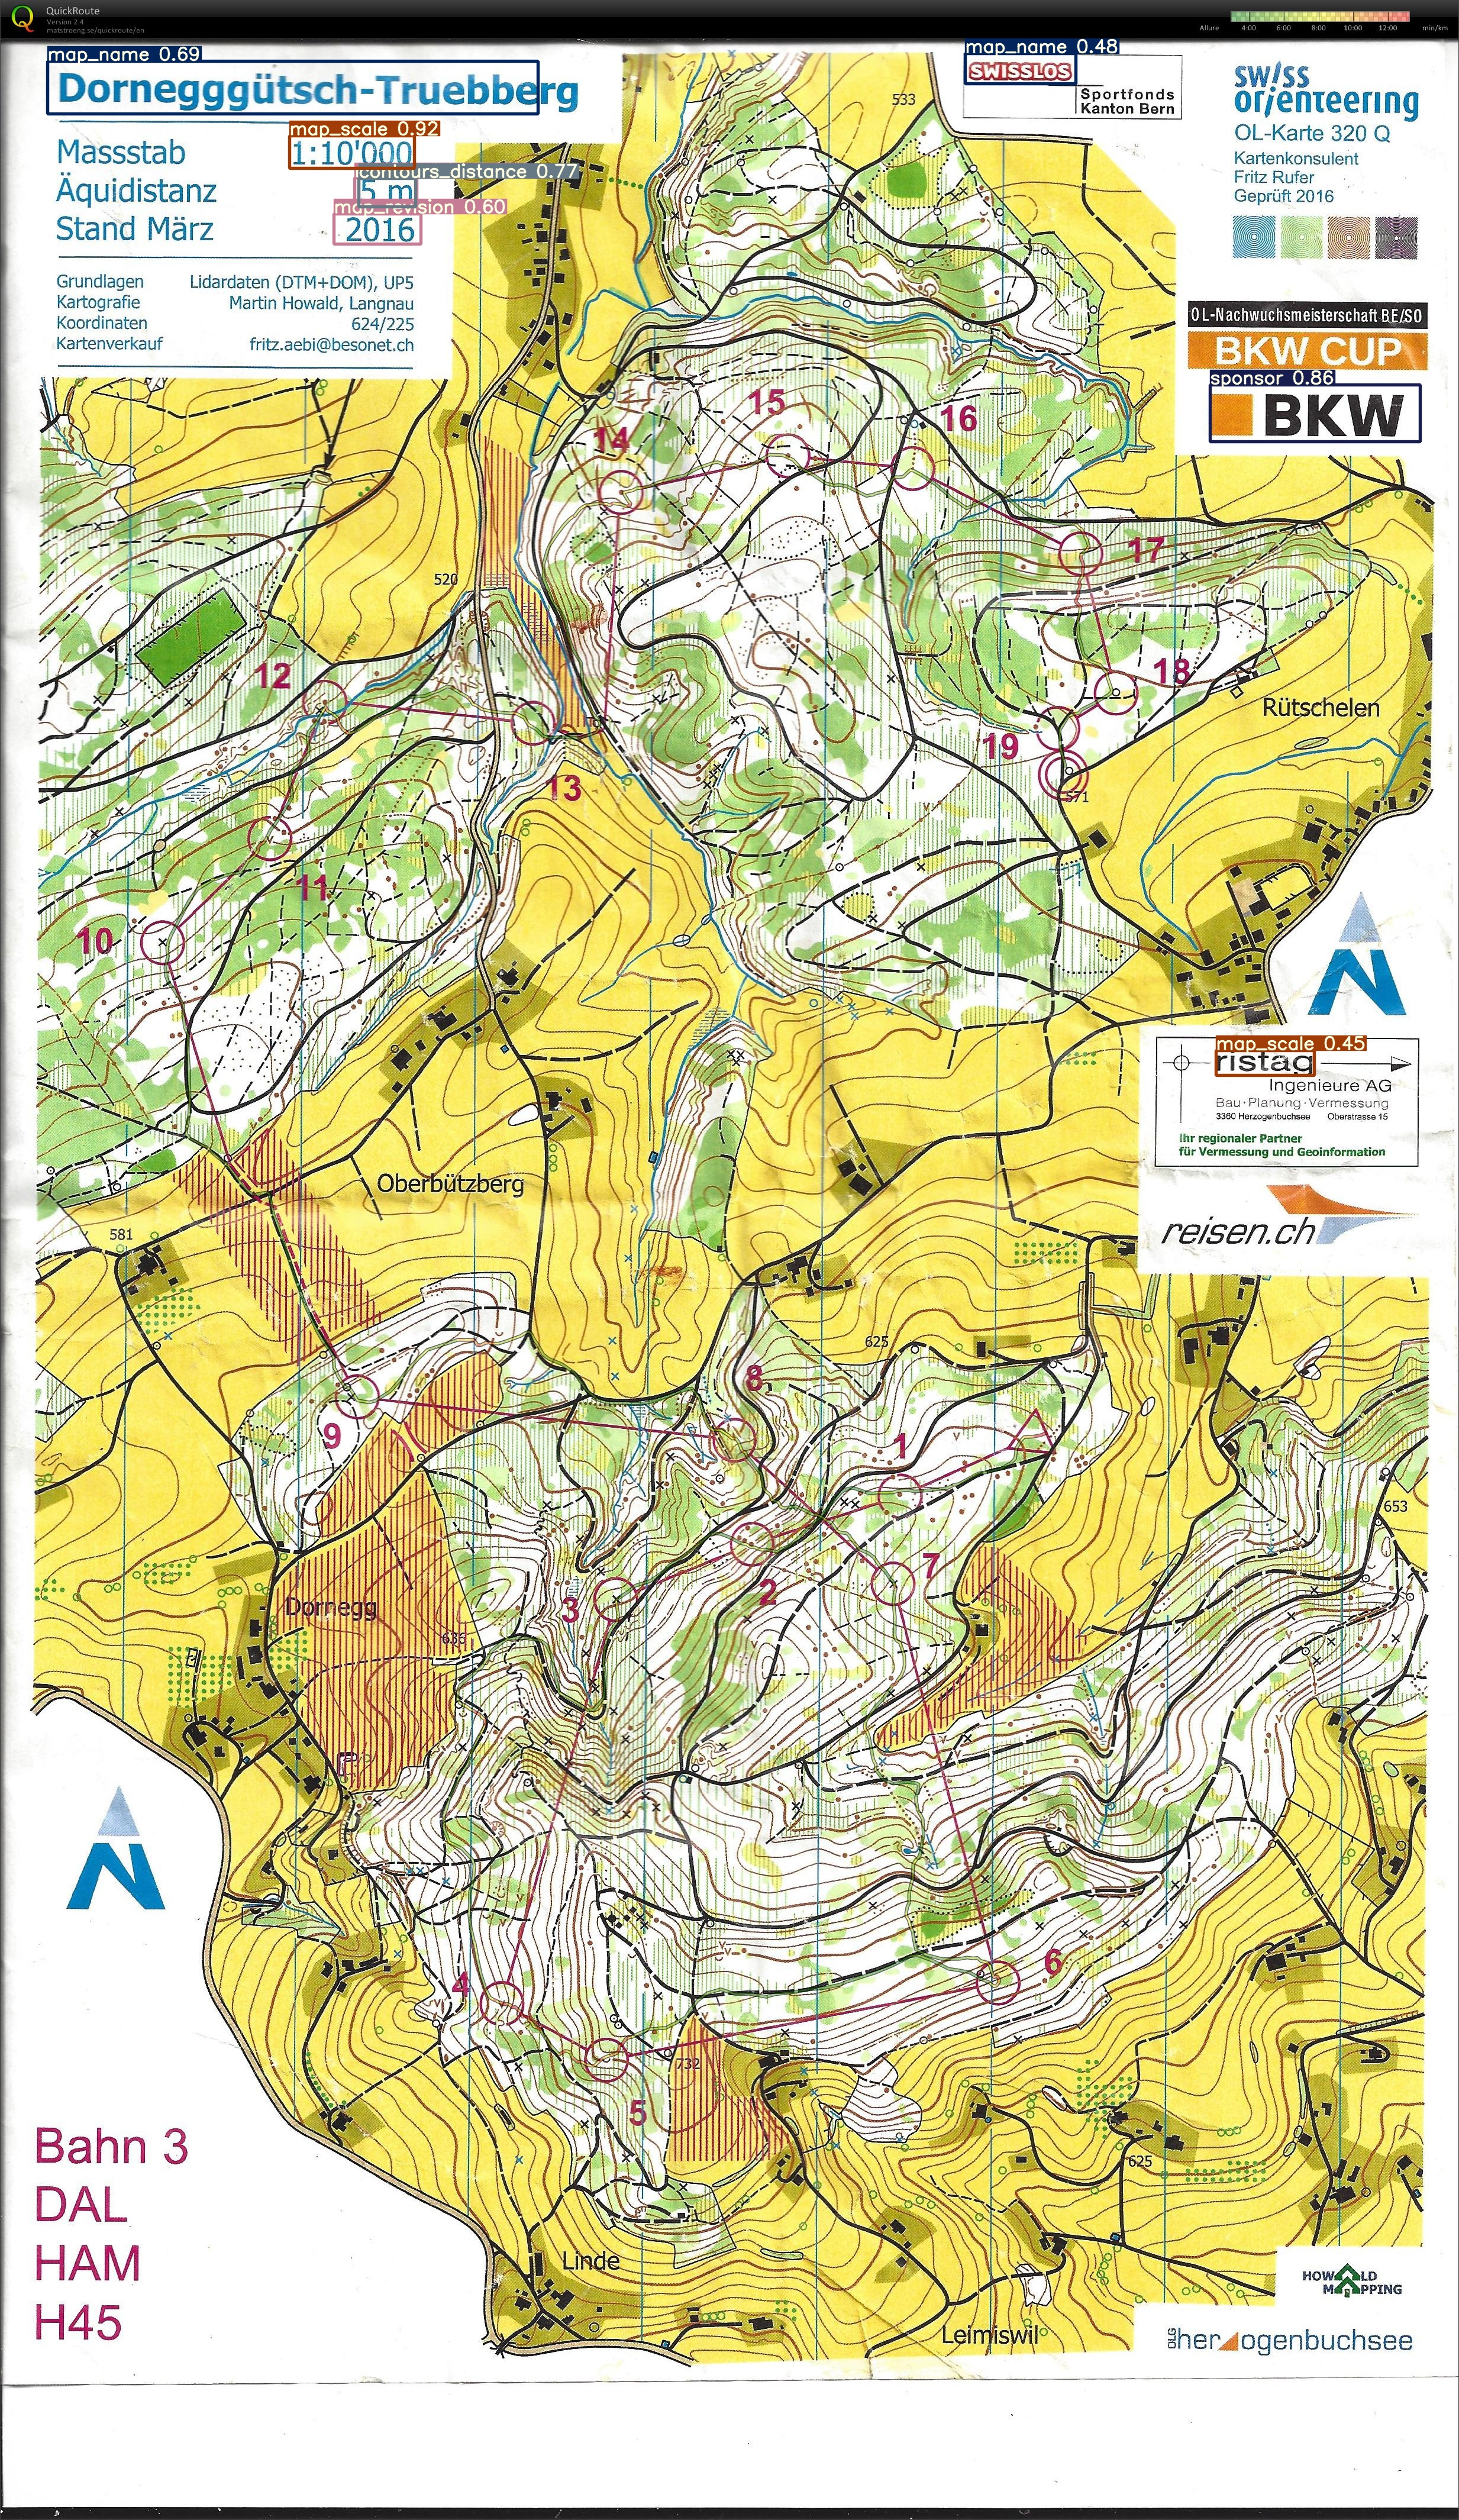

In [ ]:
Image(filename='runs/detect/exp3/1057.jpg', width=960)

In [ ]:
!python train.py --batch 16 --epochs 300 --data ../omaps/omaps.yaml --weights ./runs/train/exp3/weights/last.pt --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 v4.0-126-g886f1c0 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='../omaps/omaps.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp4', single_cls=False, sync_bn=False, total_batch_size=16, weights='./runs/train/exp3/weights/last.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-10 22:40:43.644322: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
hyperparameter

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

> <img src="https://user-images.githubusercontent.com/26833433/83667642-90fcb200-a583-11ea-8fa3-338bbf7da194.jpeg" width="750">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/83667626-8c37fe00-a583-11ea-997b-0923fe59b29b.jpeg" width="750">  
`test_batch0_labels.jpg` shows test batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/83667635-90641b80-a583-11ea-8075-606316cebb9c.jpeg" width="750">  
`test_batch0_pred.jpg` shows test batch 0 _predictions_


Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

<img src="https://user-images.githubusercontent.com/26833433/97808309-8182b180-1c66-11eb-8461-bffe1a79511d.png" width="800">


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile 

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
profile(x=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}